<a href="https://colab.research.google.com/github/ngarciap/Analisis_Cuantitativo/blob/main/Taller_3_Punto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 3

El conjunto de datos conocido como “California Housing Dataset” puede ser cargado del
paquete sklearn. La variable objetivo es el valor medio de la vivienda para los distritos de
California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó
del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de
bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica
datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).
Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El
número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas
columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos
hogares y muchas casas vacías, como centros vacacionales.

In [ ]:
#Librerías usadas
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Punto 3 - Parte 1 : Descripción del dataset
Lea el conjunto de datos usando la función fetch_california_housing del paquete
sklearn.datasets, guardelos en una variable llamada california_housing y con el comando
print(california_housing.DESCR) observe la descripción general del dataset y en
especial qué es cada una de las variables de entrada.

In [ ]:
#Cargando los datos como un dataframe
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Al ejecutar el código anterior, obtenemos una descripción detallada del conjunto de datos, incluyendo la explicación de cada variable de entrada.

 Cada fila del dataset representa un "bloque" que es la unidad geográfica más pequeña.

*   **MedInc:** Ingreso promedio de las personas en el bloque (en decenas de miles de dólares).
*   **HouseAge:** Edad media de las casas de un bloque (en años).
*   **AveRooms:** Promedio de habitaciones por hogar de un bloque.
*   **AveBedrms:** Promedio de dormitorios por hogar.
*   **Population:** Número de habitantes por bloque.
*   **AveOccup:** Ocupación media (Promedio de personas por hogar).
*   **Latitude:** Ubicación latitudinal del bloque.
*   **Longitude:** Ubicación longitudinal del bloque.


In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Se puede observar que:

*   El dataset contiene 20640 observaciones.
*   No contiene datos nulos.
*   Las variables explicativas y la variable respuesta (MedHouseVal) son cuantitativas.




## Punto 3 - Parte 2: Analísis exploratorio
Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los
comandos california_housing.data y california_housing.target. Considere la conveniencia de
incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las
correlaciones entre las variables y comente al respecto.

In [ ]:
# Crear DataFrame con todas las variables
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

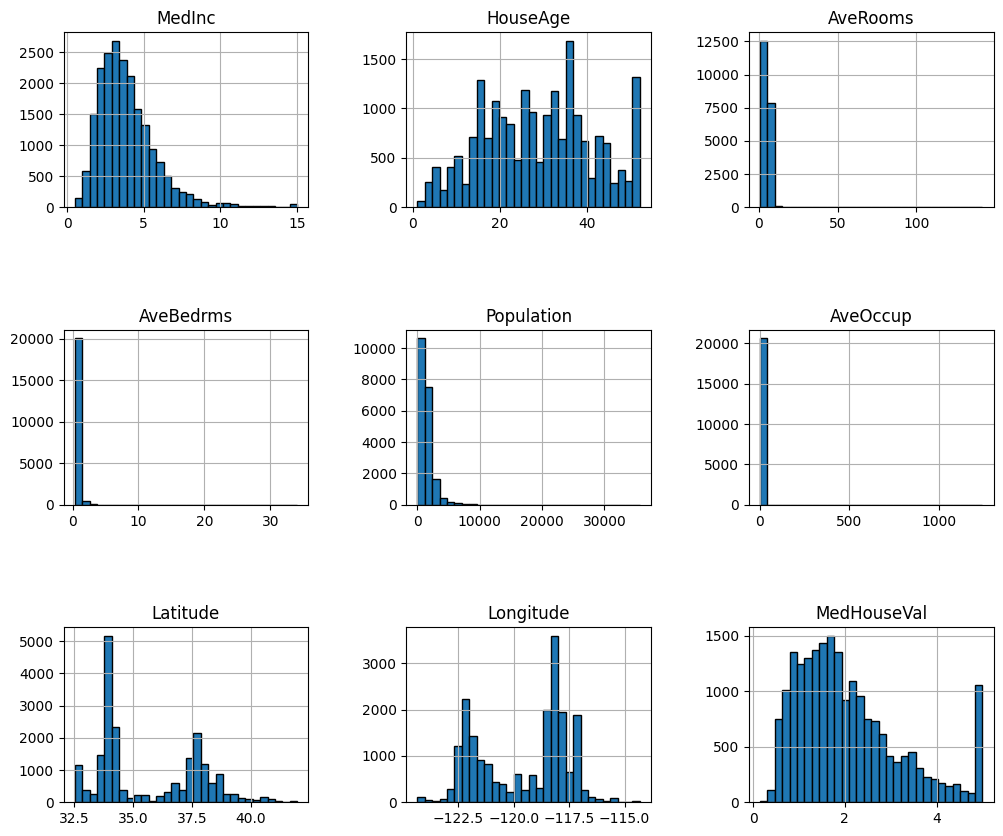

In [ ]:
# Diagramas de distribución de cada una de las variables
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

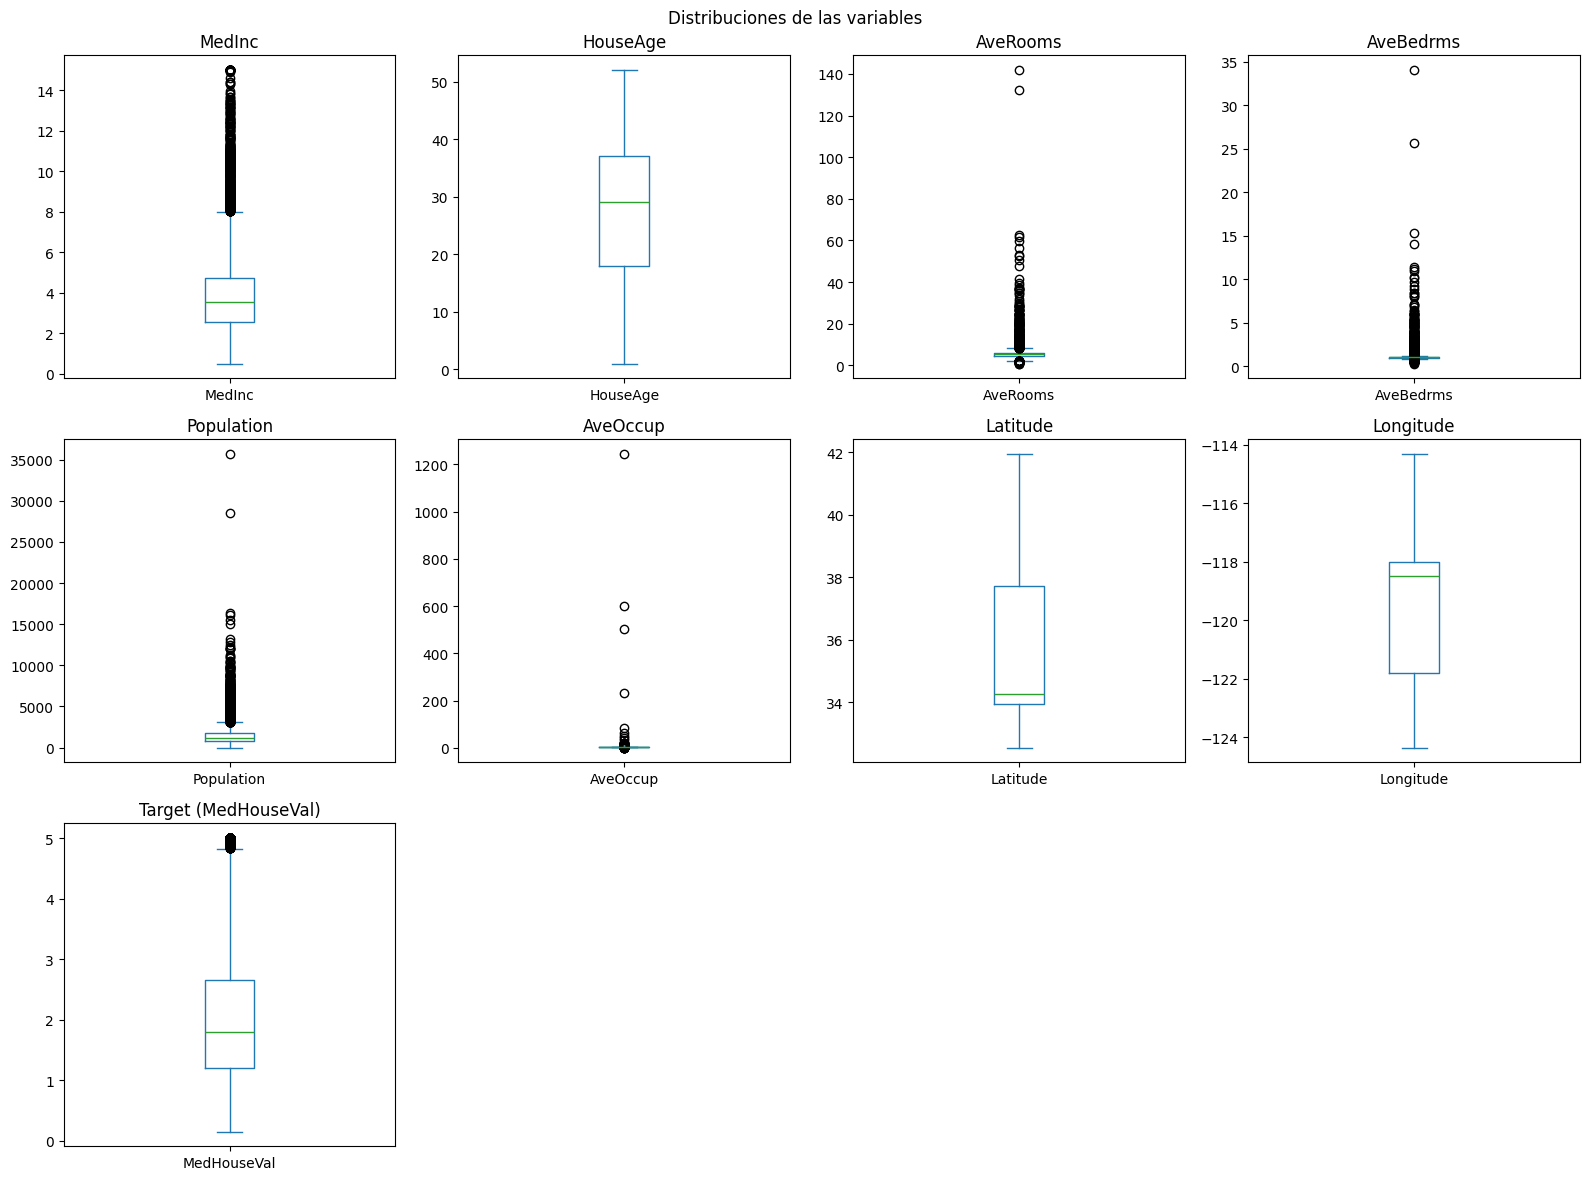

In [ ]:
# Análisis exploratorio - Boxplots
plt.figure(figsize=(16, 12))
num_plots = len(X.columns) + 1
for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    X[col].plot(kind='box')
    plt.title(col)
plt.subplot(3, 4, num_plots)
y.plot(kind='box')
plt.title('Target (MedHouseVal)')
plt.suptitle('Distribuciones de las variables')
plt.tight_layout()
plt.show()

En los diagramas de distribución y de cajas anteriores podemos describir lo siguiente:

*   La variable (MedInc) que representa los ingresos medios de cada uno de los bloques tiene una distribución con un alargamiento (cola) hacia la derecha, eso indica una distribución mas o menos normal en donde algunas personas tienen un salario alto.

*   El promedio de edad de las casas (HouseAge) tiene un comportamiento casi uniforme.

*   La distribución de la variable objetivo (MedHouseVal) tiene un alargamiento hacia la derecha en donde particularmente se fija un umbral de 5 para las casas que están por encima de este.


El resto de variables tiene comportamientos atípicos con rangos de datos amplios, que podemos describir de la siguiente manera:

In [ ]:
variables_con_atipicos = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[variables_con_atipicos].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


**Consideración sobre Longitud y Latitud:**

Las variables Longitude y Latitude representan la ubicación geográfica de los bloques. Incluir estas variables puede ser útil para capturar tendencias espaciales en el valor de las viviendas. Sin embargo, también pueden introducir complejidad y posibles problemas de multicolinealidad debido a su naturaleza continua y cercanía entre valores geográficos.

Text(0.5, 1.0, 'Gráfico de los valores promedio de las casa de acuerdo a su ubicación')

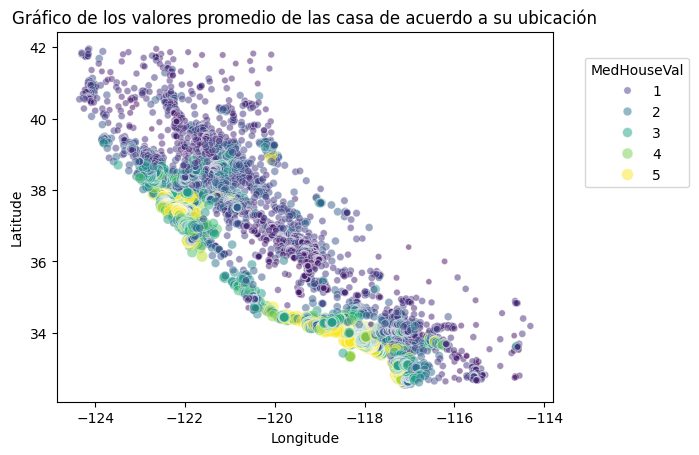

In [ ]:
# Gráfico de los valores promedio de las casa de acuerdo a su ubicación
sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Gráfico de los valores promedio de las casa de acuerdo a su ubicación")

El gráfico anterior evidencia que las casas con mayor valor promedio se encuentran ubicadas en las costas especialmente alrededor de los Angeles y la Bahia de San Fascisco.

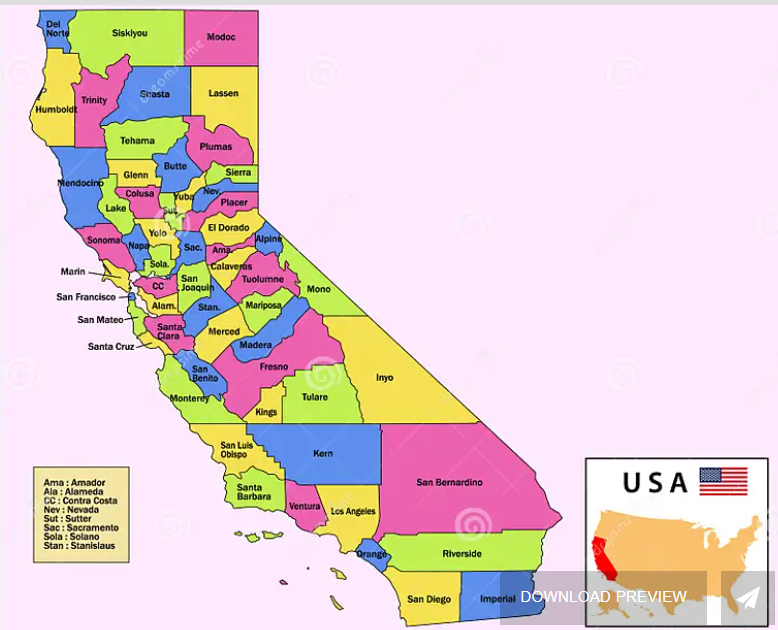

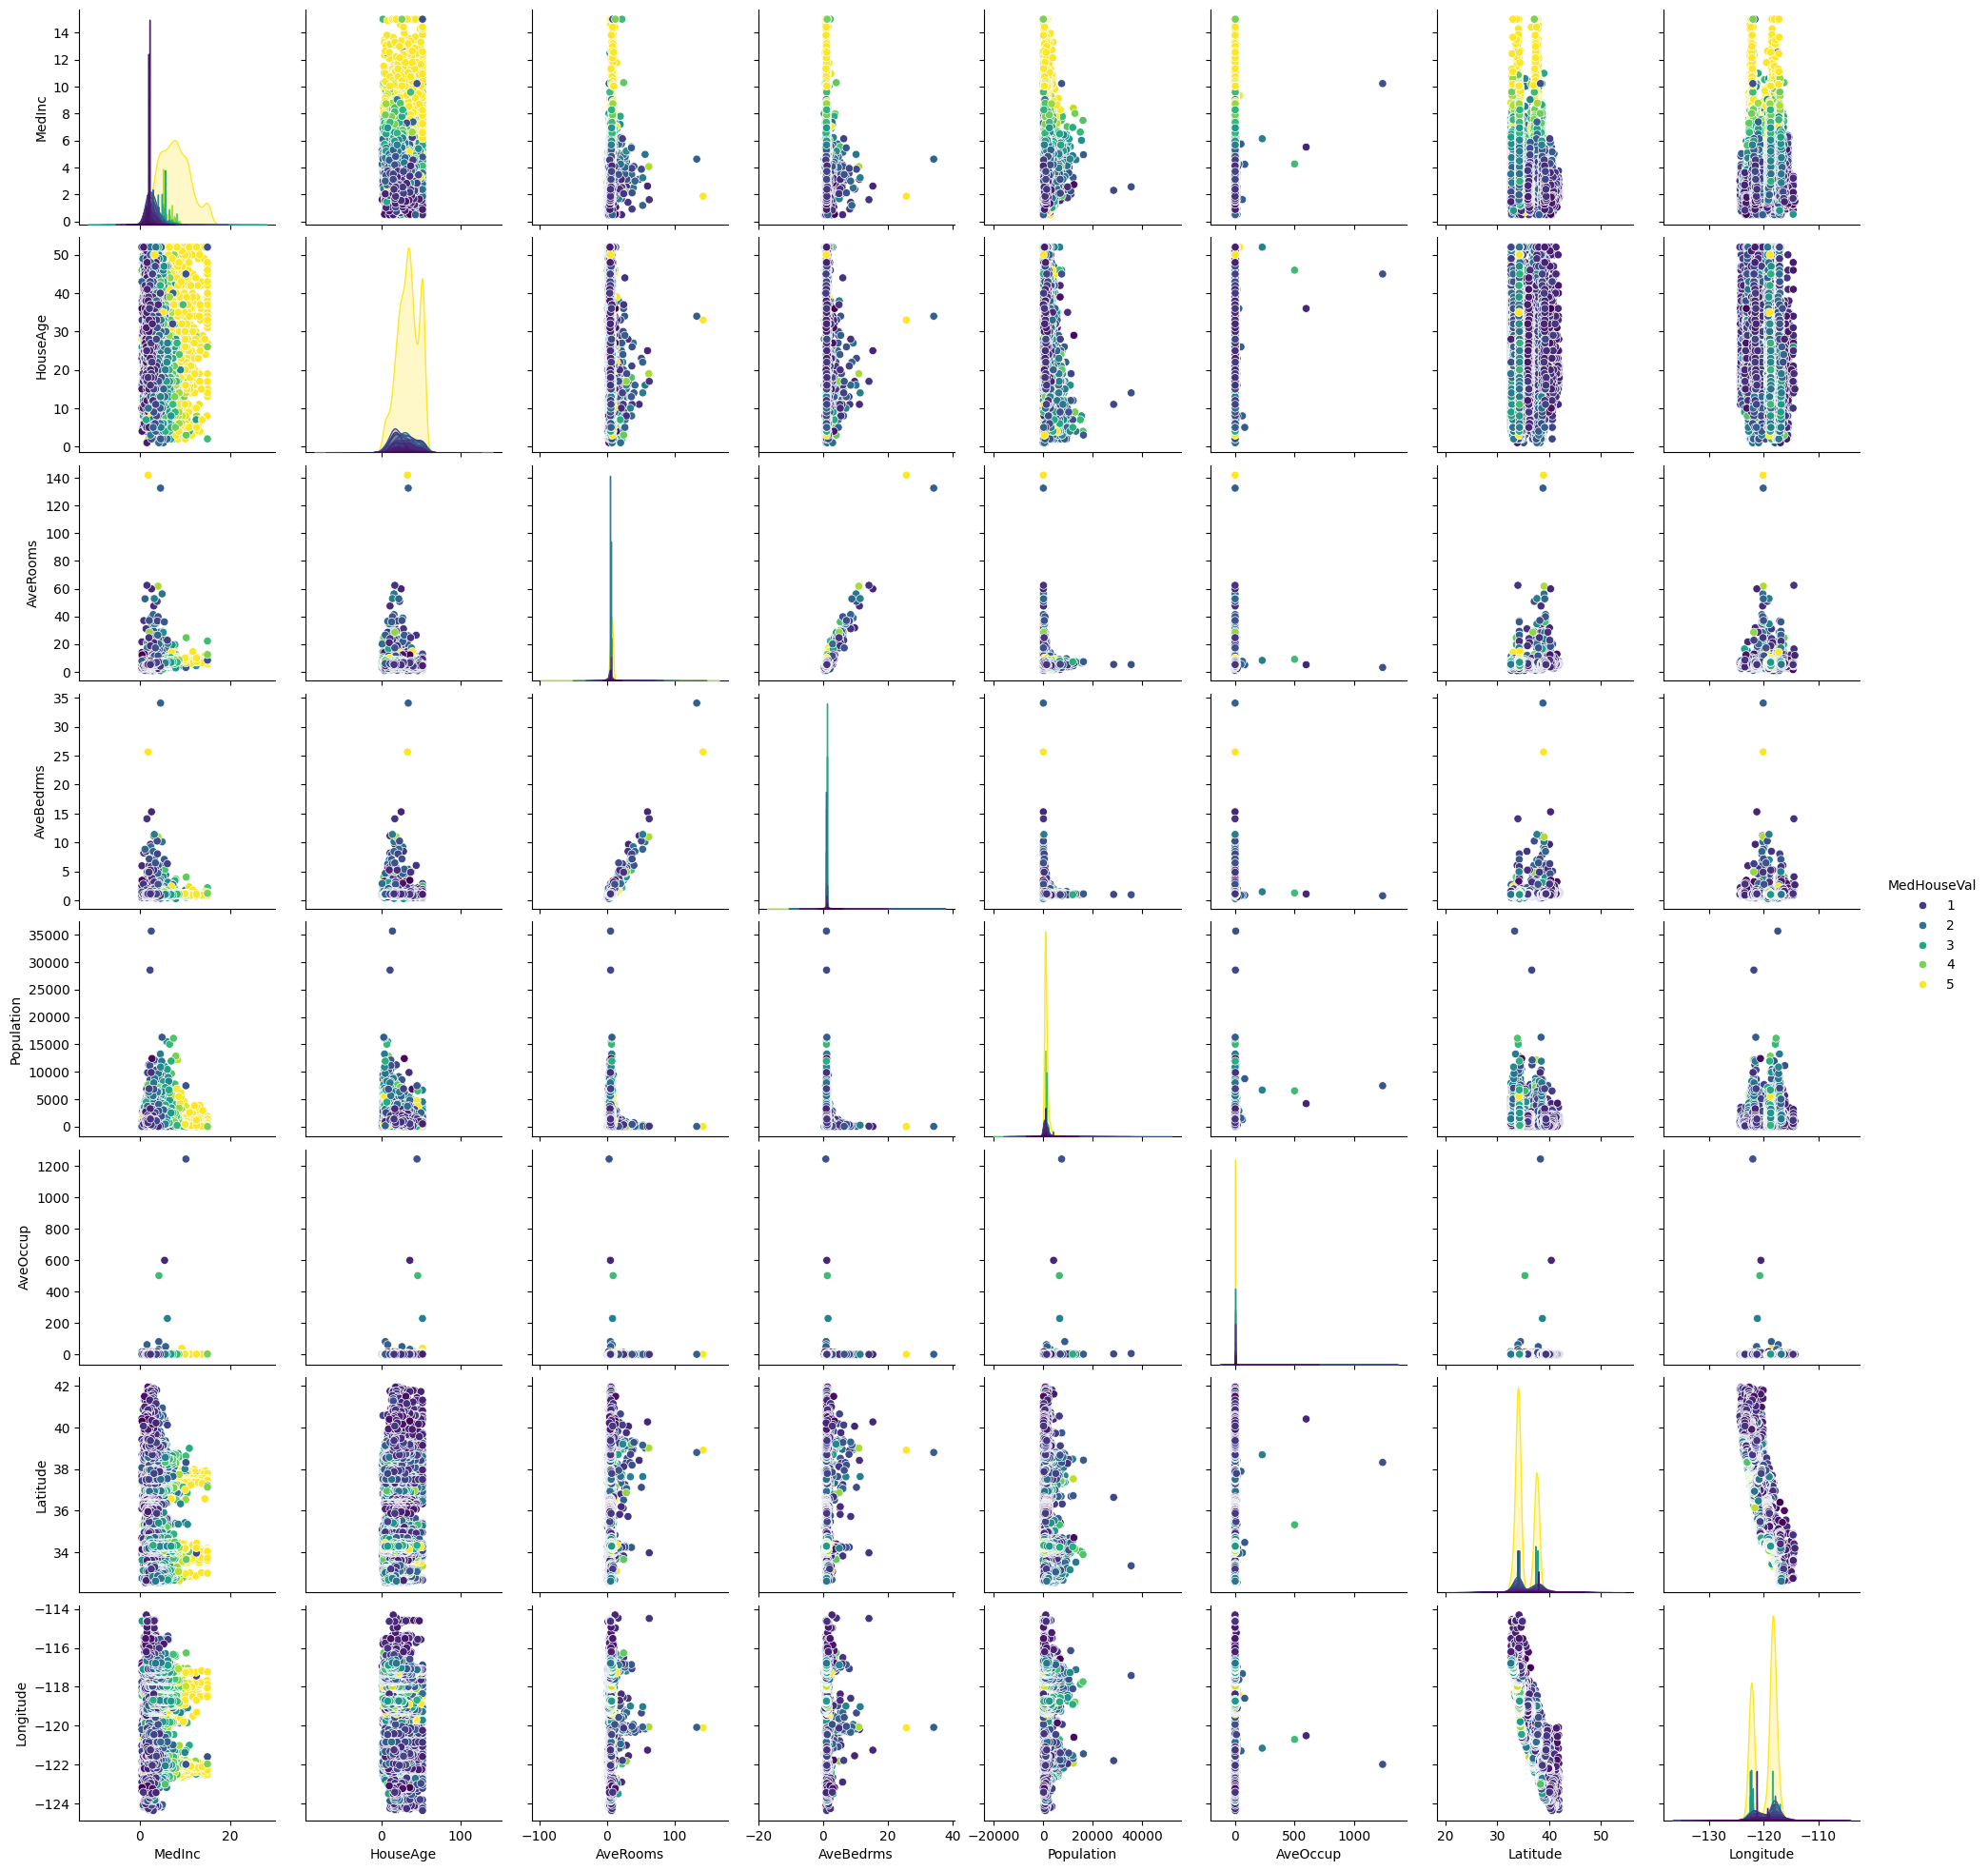

In [ ]:
# Diagramas de dispersión de cada una de las variables
sns.pairplot(data=california_housing.frame, hue="MedHouseVal", palette="viridis")

Del diagrama anterior podemos concluir lo siguiente:

*   La variable MedInc puede ayudar a distingir entre las casa de valor promedio bajo de las casas con valor promedio alto.
*   Se observa un comportamiento lineal entre las variables AveRooms y AveBedrms.
*   Se evidencia la presencia de valores atipicos.

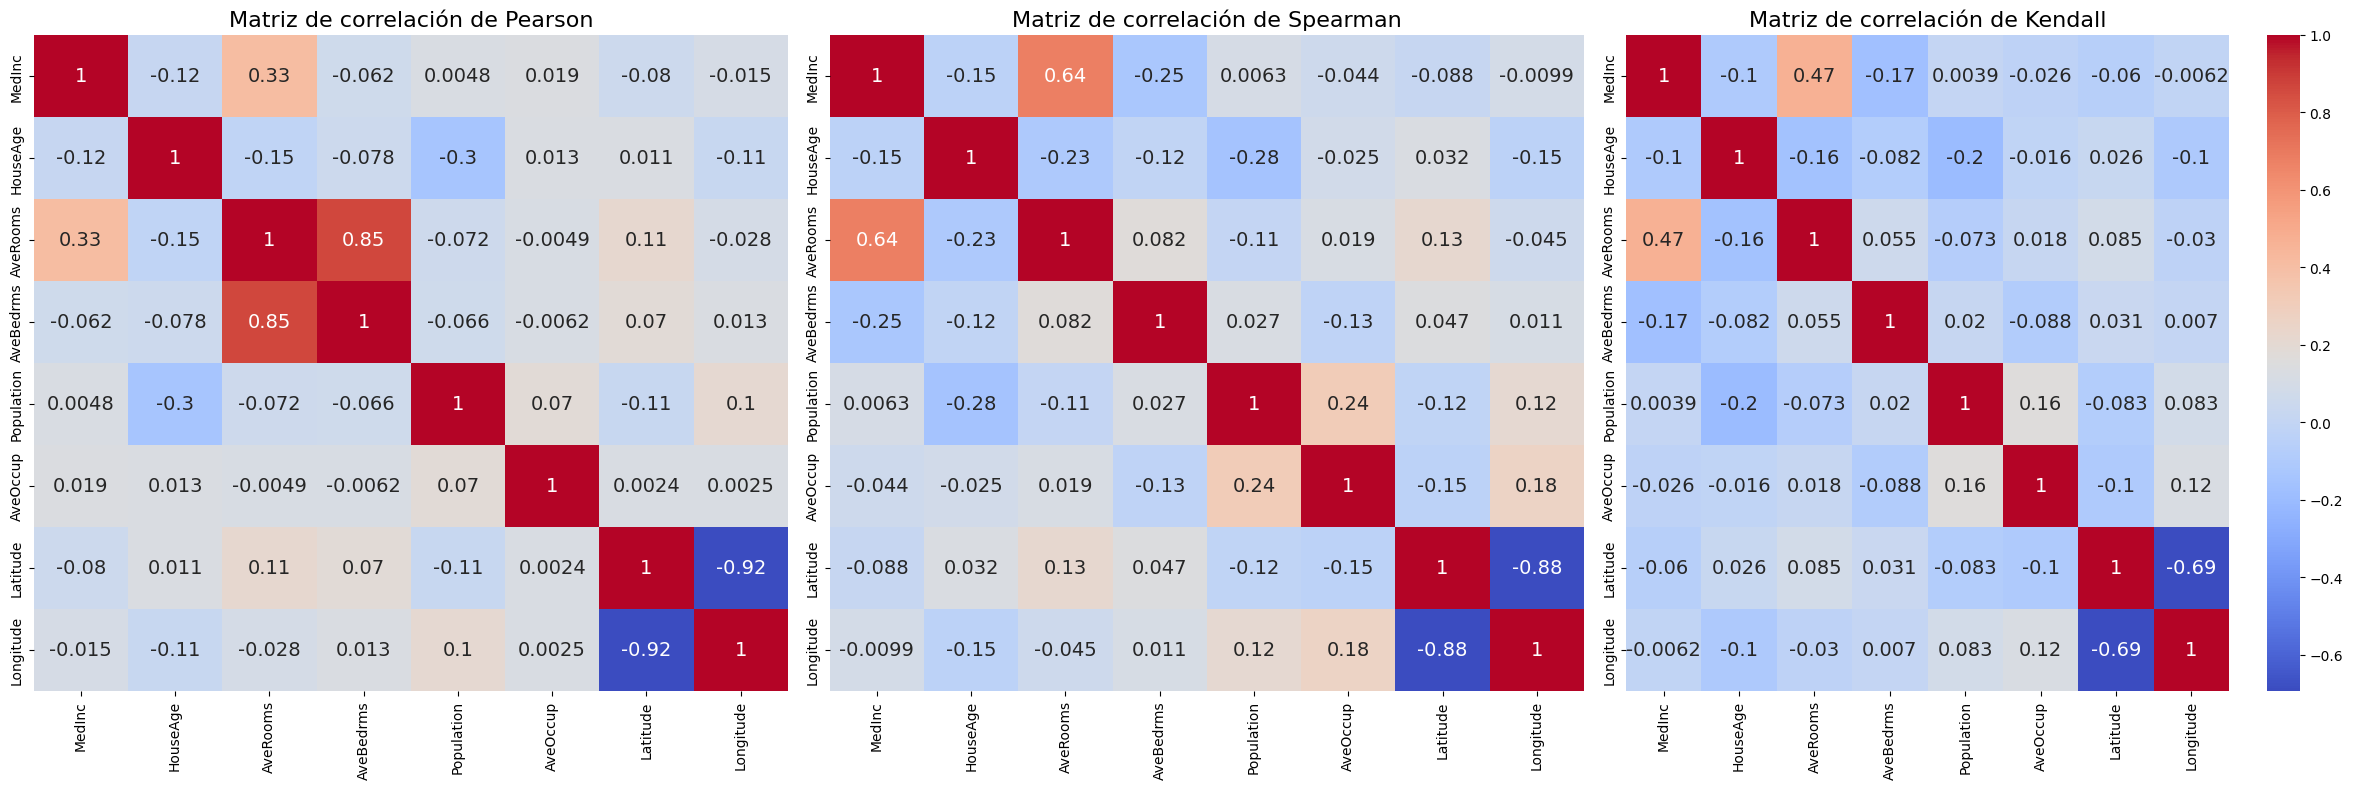

In [ ]:
# Calcular las matrices de correlación
pearson_corr = X.corr(method='pearson')
spearman_corr = X.corr(method='spearman')
kendall_corr = X.corr(method='kendall')

# Crear una figura con tres subgráficas en una fila
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Visualizar la matriz de correlación de Pearson
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=axes[0], cbar=False, annot_kws={"size": 14})
axes[0].set_title("Matriz de correlación de Pearson",size=16)

# Visualizar la matriz de correlación de Spearman
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=axes[1], cbar=False, annot_kws={"size": 14})
axes[1].set_title("Matriz de correlación de Spearman",size=16)

# Visualizar la matriz de correlación de Kendall
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', ax=axes[2], annot_kws={"size": 14})
axes[2].set_title("Matriz de correlación de Kendall",size=16)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

Existe una alta correlación positiva entre AveRooms y AveBedrms (coeficiente > 0.8, tomando como referencia Pearson y Spearman), lo cual es lógico ya que un mayor número de habitaciones promedio suele implicar un mayor número de dormitorios promedio.

Longitude y Latitude están correlacionadas negativamente (coeficiente alrededor de -0.92 y -0.88 tomando como referencia Pearson y Spearman), lo que indica que las ubicaciones geográficas en California tienen una relación espacial específica.




## Punto 3 - Parte 3: Modelo de regresión Elastic-Net
Ajuste un modelo de regresión Elastic-Net con un coeficiente de penalización pequeño,
iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema
de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas
y pare cuando no se encuentren correlaciones altas.

In [ ]:
# librerías necesarias
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos California Housing
california_housing = fetch_california_housing()

# Separar las variables explicativas X y la variable respuesta y
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir el array escalado a un DataFrame para mantener los nombres de las columnas
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Función para comprobar si hay correlaciones altas > 0.8
def has_high_correlations(data, threshold=0.8):
    corr_matrix = data.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return any(upper_tri.stack() > threshold)

# Inicializar parámetros
alpha = 0.01
best_mse = 10000000.0
best_r2 = 0.0
results = []

l1_ratios = np.linspace(0.1, 1.0, 100)
variables = df_X_train_scaled.columns.tolist()

# Iterar sobre los valores de l1_ratio
for l1_ratio in l1_ratios:
    #print(f"\nEvaluando l1_ratio = {l1_ratio}")
    # Reiniciar alpha para cada l1_ratio
    current_alpha = alpha
    selected_variables = variables.copy()
    while True:
        # Ajustar el modelo ElasticNet
        enet = ElasticNet(alpha=current_alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42)
        enet.fit(df_X_train_scaled[selected_variables], y_train)

        # Se calculan las metricas con los datos de test
        y_pred = enet.predict(df_X_test_scaled[selected_variables])
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Obtener coeficientes diferentes de cero
        coef_df = pd.DataFrame({'Variable': selected_variables, 'Coeficiente': enet.coef_})
        non_zero_coefs = coef_df[coef_df['Coeficiente'] != 0]
        selected_variables = non_zero_coefs['Variable'].tolist()

        # Si no quedan variables, romper el ciclo
        if not selected_variables:
            print("No quedan variables seleccionadas.")
            break

        # Comprobar correlaciones altas entre las variables seleccionadas
        X_selected = df_X_train_scaled[selected_variables]
        if not has_high_correlations(X_selected):
            #print(f"No se encontraron correlaciones altas entre las variables seleccionadas con alpha={current_alpha}.")
            #print(f"alpha={current_alpha}")
            #print("Variables finales seleccionadas:", selected_variables)
            #print("MSE:", mse)
            #print("R2:", r2)

            # Capturar las mejores métrias
            if mse < best_mse: best_mse = mse
            if r2 > best_r2: best_r2 = r2
            # Se almacenan los resultados donde no hay multicolinealidad
            results.append({'l1_ratio': l1_ratio, 'alpha': current_alpha, 'variables': selected_variables, 'mse':mse, 'r2':r2})
            break
        else:
            #print(f"Correlaciones altas encontradas con alpha={current_alpha}. Incrementando alpha y ajustando el modelo nuevamente.")
            # Incrementar alpha
            current_alpha += 0.01
            # Si alpha supera un umbral, detenerse para evitar un ciclo infinito
            if current_alpha > 1:
                print("Alpha ha excedido el valor máximo permitido. Deteniendo iteración.")
                break


In [ ]:
print(f"Mejor MSE: {best_mse}")
print(f"Mejor R2: {best_r2}")

Mejor MSE: 0.6638481953562752
Mejor R2: 0.49340381027652247


El algoritmo anterior permite registrar en la lista "results" cada uno de los l1_ratio, alpha , una lista con las variables seleccionadas , MSE y r2 (R cuadrado) en donde se logra eliminar la multicolinealidad de las varibales independientes.

En el siguiente dataframe podemos darnos una idea de los valores calculados en donde se logra eliminar la multicolinealidad.

In [ ]:
df_results = pd.DataFrame(results)
df_results

,l1_ratio,alpha,variables,mse,r2
0,0.100000,0.73,"[MedInc, HouseAge, Latitude]",0.798845,0.390385
1,0.109091,0.67,"[MedInc, HouseAge, Latitude]",0.786821,0.399560
2,0.118182,0.62,"[MedInc, HouseAge, Latitude]",0.776581,0.407375
3,0.127273,0.57,"[MedInc, HouseAge, Latitude]",0.765683,0.415691
4,0.136364,0.54,"[MedInc, HouseAge, Latitude]",0.759769,0.420205
...,...,...,...,...,...
95,0.963636,0.07,"[MedInc, HouseAge, Latitude]",0.664196,0.493138
96,0.972727,0.07,"[MedInc, HouseAge, Latitude]",0.664373,0.493004
97,0.981818,0.07,"[MedInc, HouseAge, Latitude]",0.664551,0.492868
98,0.990909,0.07,"[MedInc, HouseAge, Latitude]",0.664730,0.492731


In [ ]:
for item in results:
    if item['mse'] == best_mse or item['r2'] == best_r2:
        print(f'l1_ratio: {item["l1_ratio"]}, alpha: {item["alpha"]}, variables: {item["variables"]}, mse: {item["mse"]}, r2: {item["r2"]}')

l1_ratio: 0.9454545454545454, alpha: 0.07, variables: ['MedInc', 'HouseAge', 'Latitude'], mse: 0.6638481953562752, r2: 0.49340381027652247


Se recorre la lista "results" para encontrar los valores de contienen el menor MSE y el R^2 mayor. Como resultado encontramos que solo un registro cumple con esa condición siendo:

**l1_ratio = 0.9454545454545454** , lo que indica que el modelo sera aproximadamente 90% Lasso y 10% Ridge.

**alpha = 0.07** , implica un penalización moderada.

**Variables seleccionadas:** MedInc, HouseAge, Latitude . Estas variables tienen sentido en el contexto de la variable respuesta es decir que con un salario promedio, la edad de la propiedad y su localización es suficiente para determinar el valor promedio de la propiedad.

A continuación procedemos a difinir el dataframe solo con las variables seleccionadas para entrenar de nuevo un modelo y graficar el resultado.

In [ ]:
df_inicial = fetch_california_housing(as_frame=True)
df_modelo = df_inicial.frame[['MedInc', 'HouseAge', 'Latitude','MedHouseVal']]
df_modelo

,MedInc,HouseAge,Latitude,MedHouseVal
0,8.3252,41.0,37.88,4.526
1,8.3014,21.0,37.86,3.585
2,7.2574,52.0,37.85,3.521
3,5.6431,52.0,37.85,3.413
4,3.8462,52.0,37.85,3.422
...,...,...,...,...
20635,1.5603,25.0,39.48,0.781
20636,2.5568,18.0,39.49,0.771
20637,1.7000,17.0,39.43,0.923
20638,1.8672,18.0,39.43,0.847


In [ ]:
#Definir las variables explicativas
X = df_modelo.drop('MedHouseVal', axis=1)
y = df_modelo['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Estandarización de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelo_final = ElasticNet(alpha=0.07, l1_ratio=0.9454545454545454, max_iter=10000, random_state=42)
modelo_final.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.07, l1_ratio=0.9454545454545454, max_iter=10000,
           random_state=42)

In [ ]:
# Obtenemos los coeficientes
coeficientes = modelo_final.coef_
print("Coeficientes:", coeficientes)

Coeficientes: [ 0.74373864  0.14392081 -0.04278417]


De acuerdo a estos resultados podemos concluir lo siguiente:

*   La variable “MedInc” es la que tiene una mayor influencia en el modelo, le sigue la variable “HouseAge”.

*   El signo negativo nos indica que la variable “Latitude” es inversamente proporcional.

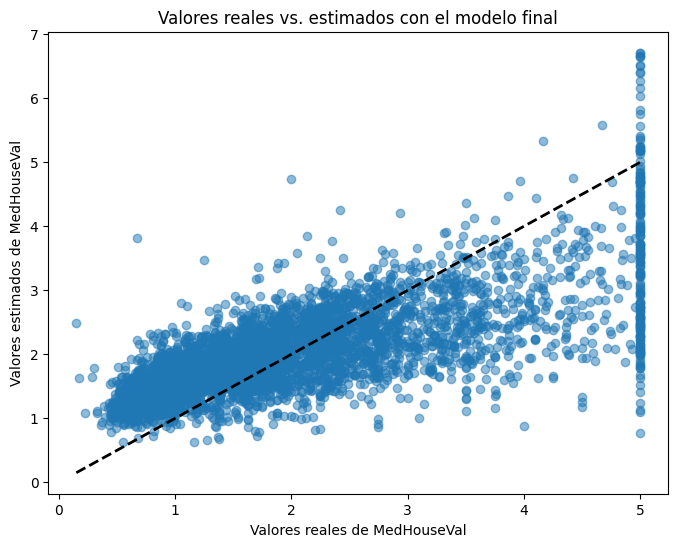

In [ ]:
# Creamos una gráfica con los valores de Y reales y los valores de Y pronosticados con el modelo final

# Predecir los valores de y para el conjunto de prueba
y_pred = modelo_final.predict(X_test_scaled)

# Crear un DataFrame con los valores reales y predichos
df_comparacion = pd.DataFrame({'y_real': y_test, 'y_pred': y_pred})

# Crear la gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales de MedHouseVal')
plt.ylabel('Valores estimados de MedHouseVal')
plt.title('Valores reales vs. estimados con el modelo final')
plt.show()